# PDBe API Training

### PDBe search

This interactive Python notebook will guide you through programmatically accessing Protein Data Bank in Europe (PDBe)
data using our REST API

The REST API is a programmatic way to obtain information from the PDB and EMDB. You can access details about:

* sample
* experiment
* models
* compounds
* cross-references
* publications
* quality
* assemblies
* search
and more...
For more information, visit https://pdbe.org/api


This tutorial will guide you through searching PDBe programmatically.


First we will import the code which will do the work
Run the cell below - by pressing the green play button.

In [1]:
from pprint import pprint
from solrq import Q, Range
import sys
sys.path.insert(0,'..')
from python_modules.api_modules import run_search, pandas_dataset, pandas_count, pandas_plot, pandas_plot_multi_groupby

Now we are ready to actually run a search against the PDB API for entries containing Acetylcholinesterase from *Homo sapiens*  from  in the PDB. This will return a list of results - only 10 to start with.

A list of search terms is available at:
https://www.ebi.ac.uk/pdbe/api/doc/search.html

We are going to search for the molecule name "Acetylcholinesterase" in the PDB

The search terms are defined using a module called Q

We have imported a function called "run_search" that will do the search for us.
We have limited this to 10 results and we will print finished at the end to show its complete

In [2]:
print('1st search - limited to 10 results')

search_terms = Q(molecule_name='Acetylcholinesterase')

first_results = run_search(search_terms)
print('finished')

1st search - limited to 10 results
Number of results for molecule_name:Acetylcholinesterase: 10
finished


what if we try to search for something that doesn't exist

In [3]:
print('Getting the search wrong')

search_terms = Q(something_that_does_not_exist="Acetylcholinesterase")
false_results = run_search(search_terms)

Getting the search wrong
Number of results for something_that_does_not_exist:Acetylcholinesterase: 0


In [4]:
search_terms = Q(molecule_name="bob")
false_results2 = run_search(search_terms)

Number of results for molecule_name:bob: 0


or we define our search terms incorrectly (this will fail)

In [5]:
search_terms = Q('bob')
false_results3 = run_search(search_terms)

AttributeError: 'str' object has no attribute 'compile'

We will add organism_name of *Homo sapiens* to the query to limit the results to only return those that are structures of the human Acetylcholinesterase.

In [6]:
print('2nd search - two terms together')
search_terms = Q(organism_name='Homo sapiens', molecule_name='Acetylcholinesterase')
second_results = run_search(search_terms)


2nd search - two terms together
Number of results for organism_name:Homo\ sapiens AND molecule_name:Acetylcholinesterase: 10


For more complicated queries have a look at the documentation
https://solrq.readthedocs.io/en/latest/index.html

How did we know which search terms to use?

We will then look at the results of the last search.

We will look at the first result with the following command
i.e. second_results[0]

We are going to use "pprint" (pretty print) rather than "print" to make the result easier to read.

All of the "keys" on the left side of the results can be used as a search term.

In [7]:
pprint(second_results[0])

{'_version_': 1767963691052957696,
 'all_assembly_composition': ['protein structure'],
 'all_assembly_form': ['homo'],
 'all_assembly_id': ['1'],
 'all_assembly_mol_wt': [122.073],
 'all_assembly_type': ['dimer'],
 'all_authors': ['Bae SY',
                 'Bester SM',
                 'Cheung J',
                 'Guelta MA',
                 'Height JJ',
                 'Pegan SD'],
 'all_compound_names': ['NAG : 2-acetamido-2-deoxy-beta-D-glucopyranose',
                        'L1M : ethyl '
                        '(R)-N-[(1E)-1-(diethylamino)ethylidene]phosphonamidate',
                        'FUC : alpha-L-fucopyranose',
                        'HI6 : '
                        '4-(AMINOCARBONYL)-1-[({2-[(E)-(HYDROXYIMINO)METHYL]PYRIDINIUM-1-YL}METHOXY)METHYL]PYRIDINIUM',
                        'FUC :  6-deoxy-alpha-L-galactopyranose',
                        'FUC :  L-fucose',
                        'FUC :  fucose',
                        'FUC : 6-deoxy-alpha-L-galactopyra

We use terms prefixed with q_ and t_ for our internal use so we can exclude the
 list of available search terms is available using the following command and then see how many search terms there are

In [8]:
keys_without_q = [q for q in second_results[0].keys() if not (q.startswith('q_') or (q.startswith('t_')))]
print('There are {} available search terms'.format(len(keys_without_q)))

There are 226 available search terms


and then print out the terms we can use

In [9]:
pprint(keys_without_q)

['all_assembly_composition',
 'all_assembly_form',
 'all_assembly_id',
 'all_assembly_mol_wt',
 'all_assembly_type',
 'all_authors',
 'all_molecule_names',
 'all_num_interacting_entity_id',
 'assembly_composition',
 'assembly_form',
 'assembly_id',
 'assembly_mol_wt',
 'assembly_num_component',
 'assembly_symmetry',
 'assembly_type',
 'beam_source_name',
 'biological_cell_component',
 'all_go_terms',
 'biological_function',
 'biological_process',
 'bound_compound_id',
 'bound_compound_name',
 'bound_compound_synonym',
 'bound_compound_systematic_name',
 'bound_compound_weight',
 'carb_compound_id',
 'carb_compound_id_entity',
 'carb_compound_name',
 'carb_compound_synonym',
 'carb_compound_systematic_name',
 'carb_compound_weight',
 'carb_entity_id',
 'cath_architecture',
 'all_structure_family',
 'cath_class',
 'cath_code',
 'cath_homologous_superfamily',
 'cath_topology',
 'cell_a',
 'cell_alpha',
 'cell_b',
 'cell_beta',
 'cell_c',
 'cell_gamma',
 'chain_id',
 'citation_authors',
 '

As you can see we get lots of data back about the individual molecule we have searched for and the PDB entries
in which it is contained.

We can get the PDB ID and structure resolution for this first result as follows.

In [10]:
print(second_results[0].get('pdb_id'))
print(second_results[0].get('resolution'))

6ntg
2.652


There are too many different terms to look through so we can restrict the results to only the information we want
using a filter so its easier to see the information we want.

In [11]:
print('3rd search')
search_terms = Q(molecule_name="Acetylcholinesterase",organism_name="Homo sapiens")
filter_terms = ['pdb_id', 'resolution']
third_results = run_search(search_terms, filter_terms)
pprint(third_results)

3rd search
Number of results for molecule_name:Acetylcholinesterase AND organism_name:Homo\ sapiens: 10
[{'pdb_id': '6ntg', 'resolution': 2.652},
 {'pdb_id': '6o5s', 'resolution': 2.801},
 {'pdb_id': '6o50', 'resolution': 2.352},
 {'pdb_id': '6o4w', 'resolution': 2.35},
 {'pdb_id': '6o5v', 'resolution': 2.152},
 {'pdb_id': '6o66', 'resolution': 2.452},
 {'pdb_id': '6nea', 'resolution': 2.419},
 {'pdb_id': '6ntl', 'resolution': 2.25},
 {'pdb_id': '6o4x', 'resolution': 2.3},
 {'pdb_id': '6nto', 'resolution': 2.052}]


We are still restricting the number of entries to 10 so we get the results quickly

We will then increase the number of rows to 1000 - depending on the search we might get fewer than 1000 results back

In [12]:
print('Project aims 1: Search all the structures of Human Acetylcholinesterase, Search with up to 1000 rows')
search_terms = Q(molecule_name="Acetylcholinesterase",organism_name="Homo sapiens")
filter_terms = ['pdb_id', 'resolution', 'release_year']
third_results_more_rows = run_search(search_terms,filter_terms, number_of_rows=1000)
pprint(third_results_more_rows)

Project aims 1: Search all the structures of Human Acetylcholinesterase, Search with up to 1000 rows
Number of results for molecule_name:Acetylcholinesterase AND organism_name:Homo\ sapiens: 76
[{'pdb_id': '6ntg', 'release_year': 2020, 'resolution': 2.652},
 {'pdb_id': '6o5s', 'release_year': 2019, 'resolution': 2.801},
 {'pdb_id': '6o50', 'release_year': 2019, 'resolution': 2.352},
 {'pdb_id': '6o4w', 'release_year': 2019, 'resolution': 2.35},
 {'pdb_id': '6o5v', 'release_year': 2019, 'resolution': 2.152},
 {'pdb_id': '6o66', 'release_year': 2019, 'resolution': 2.452},
 {'pdb_id': '6nea', 'release_year': 2019, 'resolution': 2.419},
 {'pdb_id': '6ntl', 'release_year': 2020, 'resolution': 2.25},
 {'pdb_id': '6o4x', 'release_year': 2019, 'resolution': 2.3},
 {'pdb_id': '6nto', 'release_year': 2020, 'resolution': 2.052},
 {'pdb_id': '6ntm', 'release_year': 2020, 'resolution': 2.552},
 {'pdb_id': '6wuz', 'release_year': 2021, 'resolution': 2.253},
 {'pdb_id': '6wv1', 'release_year': 2021, 

We are going to use a Python package called Pandas to help us analyse and visualise the results

In [13]:
df = pandas_dataset(list_of_results=third_results_more_rows)
print(df)

   pdb_id  release_year  resolution
0    6ntg          2020    2.652000
1    6o5s          2019    2.801000
2    6o50          2019    2.352000
3    6o4w          2019    2.350000
4    6o5v          2019    2.152000
..    ...           ...         ...
71   7d9o          2021    2.450000
72   6f25          2018    3.051997
73   4ey7          2012    2.350900
74   5hq3          2016    2.600000
75   5hq3          2016    2.600000

[76 rows x 3 columns]


We can save the results to a CSV file which we can load into excel

In [14]:
df.to_csv("search_results_project_aims_1.csv")
print('Search results with structures of Human Acetylcholinesterase written in filename:search_results_project_aims_1.csv')

Search results with structures of Human Acetylcholinesterase written in filename:search_results_project_aims_1.csv


We can use the this to count how many PDB codes there are for each resolution
This groups PDB IDs by resolution value and then counts the number of unique PDB IDs per method.

In [15]:
pandas_count(df=df,
             column_to_group_by='resolution')

resolution
2.000000    1
2.052000    1
2.081000    1
2.152000    2
2.156000    1
2.190000    1
2.200000    1
2.201000    1
2.207000    1
2.216000    1
2.250000    2
2.253000    1
2.273000    1
2.278000    1
2.289000    1
2.300000    2
2.301200    1
2.304000    1
2.308000    2
2.350000    2
2.350900    1
2.352000    1
2.372000    1
2.398300    1
2.400000    4
2.406000    1
2.419000    1
2.421000    1
2.449000    1
2.450000    2
2.452000    1
2.460000    1
2.500000    1
2.552000    1
2.595800    1
2.599000    1
2.600000    3
2.601000    1
2.630000    1
2.652000    1
2.660000    1
2.697000    1
2.760000    1
2.800000    4
2.801000    1
2.803000    1
2.850000    2
2.900000    2
2.950000    2
3.000000    2
3.030000    1
3.051997    1
3.104000    1
3.200000    2
Name: pdb_id, dtype: int64

or plot the results as a histogram

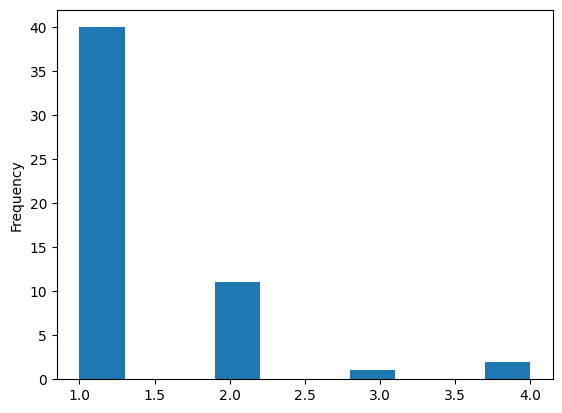

In [16]:
pandas_plot(df=df,
            column_to_group_by='resolution',
            graph_type='hist'
            )

or plot per release year

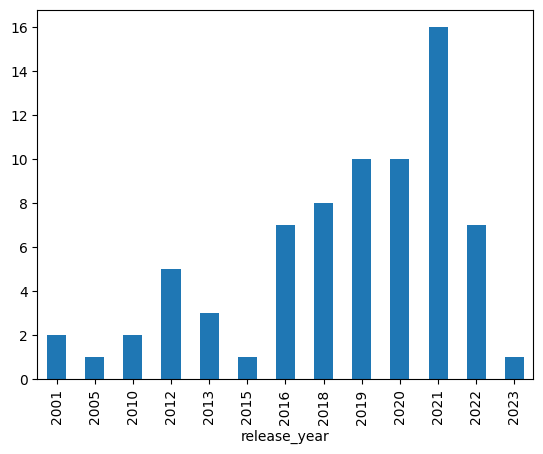

In [17]:
pandas_plot(df=df,
            column_to_group_by='release_year',
            graph_type='bar'
            )

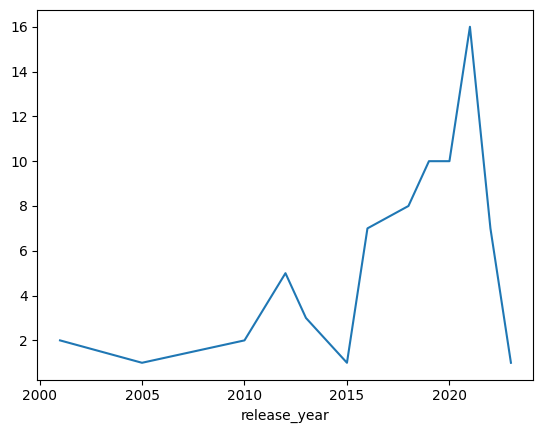

In [18]:

pandas_plot(df=df,
            column_to_group_by='release_year',
            graph_type='line'
            )

maybe a line plot makes more sense here

In [19]:
print('Project aims 2- Searching all the interacting macromolecules')
search_terms = Q(molecule_name="Acetylcholinesterase",organism_name="Homo sapiens")
filter_terms = ['pdb_id','interacting_uniprot_accession']
fourth_results = run_search(search_terms, filter_terms, number_of_rows = 1000)
#pprint(fourth_results)
df4 = pandas_dataset(list_of_results=fourth_results)
df4.to_csv("search_results_project_aims_2.csv")
print('Search results with interacting macromolecules written in filename:search_results_project_aims_2.csv')

Project aims 2- Searching all the interacting macromolecules
Number of results for molecule_name:Acetylcholinesterase AND organism_name:Homo\ sapiens: 76
Search results with interacting macromolecules written in filename:search_results_project_aims_2.csv


In [20]:
print('Project aims 2- Searching all the interacting ligands')
search_terms = Q(molecule_name="Acetylcholinesterase",organism_name="Homo sapiens")
filter_terms = ['pdb_id','interacting_ligands']
fifth_results = run_search(search_terms, filter_terms, number_of_rows = 1000)
#pprint(fourth_results)
df5 = pandas_dataset(list_of_results=fifth_results)
df5.to_csv("search_results_project_aims_3.csv")
print('Search results with interacting ligands/small molecules written in filename:search_results_project_aims_3.csv')

Project aims 2- Searching all the interacting ligands
Number of results for molecule_name:Acetylcholinesterase AND organism_name:Homo\ sapiens: 76
Search results with interacting ligands/small molecules written in filename:search_results_project_aims_3.csv


Some data is only available through the search API and not the web interface.
An example of this is information about antibodies.  

In [21]:
search_terms = Q(antibody_flag='Y')
filter_terms = ['antibody_flag', 'antibody_name', 'antibody_species', 'pdb_id']
api_only_results1 = run_search(search_terms, filter_terms=filter_terms, number_of_rows=1000000)
print(len(api_only_results1))

Number of results for antibody_flag:Y: 15095
15095


In [23]:
df = pandas_dataset(api_only_results1)
print(df)
ds = df.groupby('pdb_id').count()
print(len(ds))
#ds = df.groupby('antibody_species').count().sort_values('antibody_flag', ascending=False)
#print(ds)
#ds.to_csv('output.csv')


      antibody_flag                         antibody_name antibody_species  \
0                 Y                        IG-heavy chain            human   
1                 Y                  IG-light kappa chain            human   
2                 Y                        IG-heavy chain            human   
3                 Y                        IG-heavy chain            human   
4                 Y                 IG-light lambda chain            human   
...             ...                                   ...              ...   
15090             Y                  IG-light kappa chain            mouse   
15091             Y   IG-heavy chain,IG-light kappa chain            human   
15092             Y                  IG-light kappa chain            mouse   
15093             Y                  IG-light kappa chain            mouse   
15094             Y  IG-heavy chain,IG-light lambda chain            mouse   

      pdb_id  
0       6u9u  
1       6u9u  
2       6gjs  
3  